# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering #


## Implement the intensity transformation  ##



(-0.5, 719.5, 809.5, -0.5)

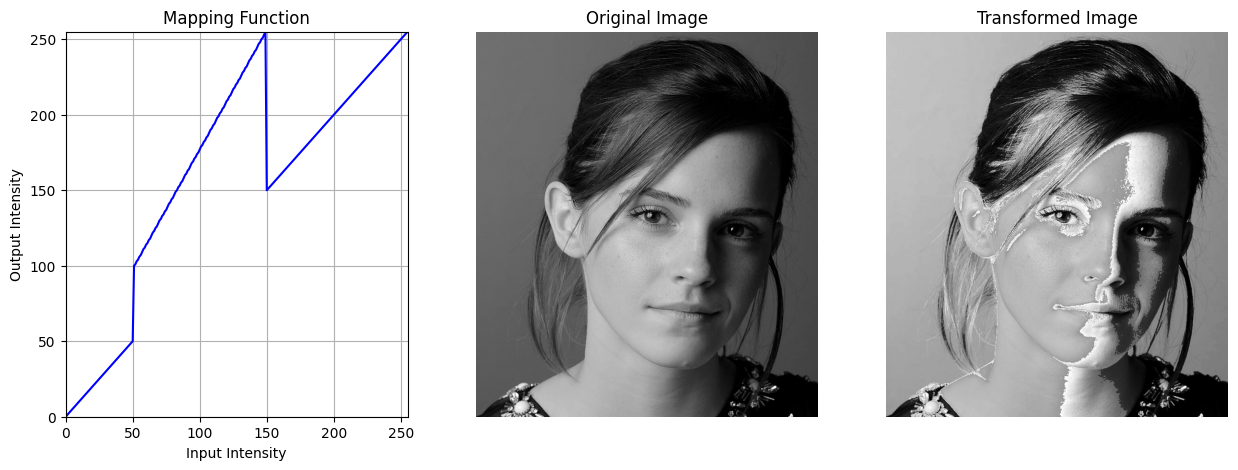

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define breakpoints and mappings
# Each tuple: (input_intensity, output_intensity)
cp_emma = np.array([
    (0, 0),
    (50, 50),
    (51, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], dtype=np.float32)

# Create LUT
LUT = np.zeros(256, dtype=np.uint8)

def linear_transform(control_points,lut ):
    for i in range(len(control_points) - 1):
        x1, y1 = control_points[i]
        x2, y2 = control_points[i + 1]
        slope = (y2 - y1) / (x2 - x1)
        for x in range(int(x1), int(x2) + 1):
            lut[x] = np.clip(slope * (x - x1) + y1, 0, 255)
    return lut
            
LUT = linear_transform(cp_emma, LUT)
# Read image in grayscale
img_orig = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(LUT, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(132)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

img_transformed = cv2.LUT(img_orig, LUT)
plt.subplot(133)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')




##  Brain Proton Density Image ##


### White Matter ###


<function matplotlib.pyplot.show(close=None, block=None)>

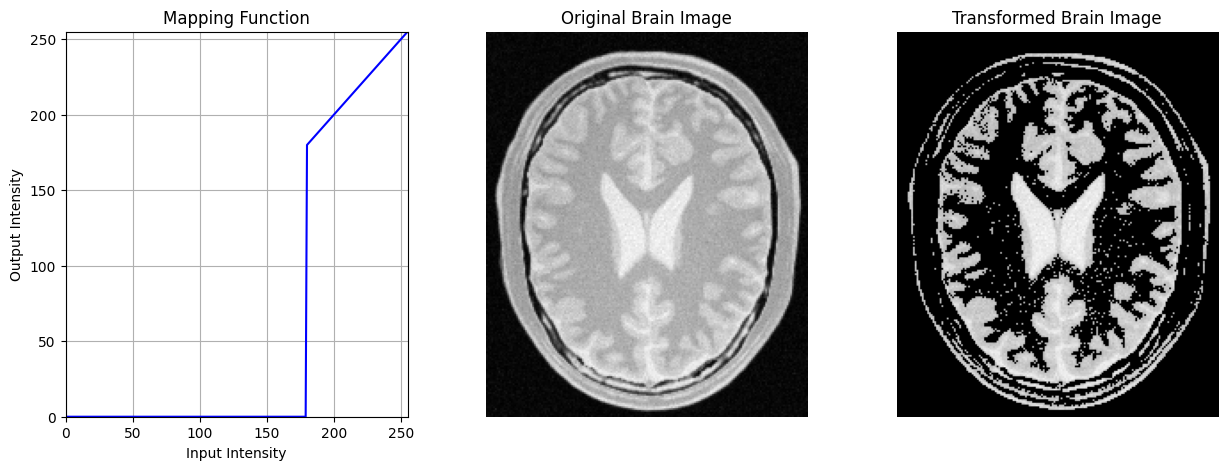

In [85]:
cp_wm = np.array([
    (0,0),
    (179,0),
    (180,180),
    (255,255)
])

wm_lut = np.zeros(256, dtype=np.uint8)

wm_lut = linear_transform(cp_wm, wm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(wm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)



img_brain = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(132)
plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

img_brain_transformed_WM = cv2.LUT(img_brain, wm_lut)

plt.subplot(133)
plt.imshow(img_brain_transformed_WM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show

### Gray Matter


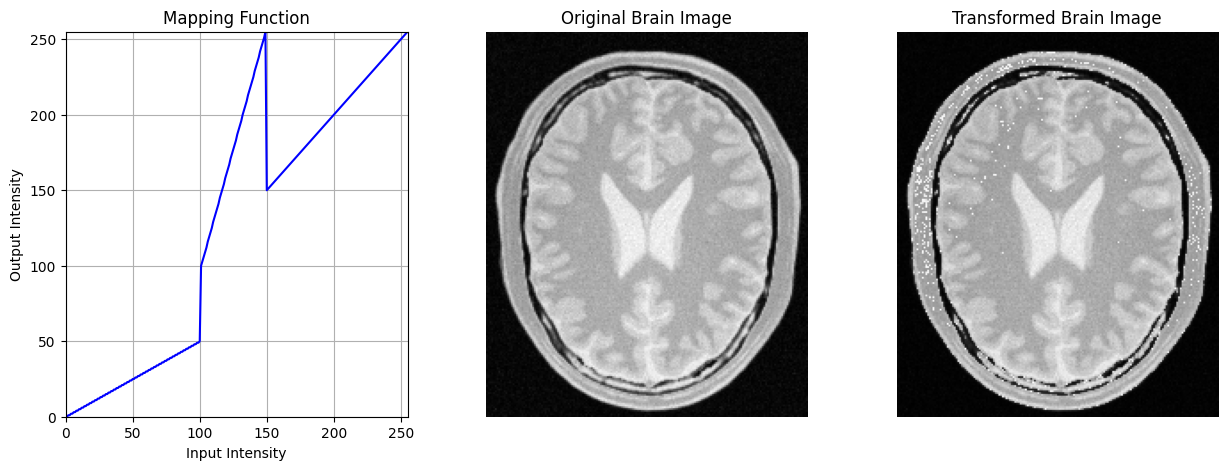

In [86]:
cp_gm = np.array([
   (0, 0),
    (100, 50),
    (101, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], )

   
gm_lut = np.zeros(256, dtype=np.uint8) 
gm_lut = linear_transform(cp_gm, gm_lut)
img_brain_transformed_GM = cv2.LUT(img_brain, gm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(gm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)


plt.subplot(132)

plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_brain_transformed_GM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show()



## Applying Gamma Correction

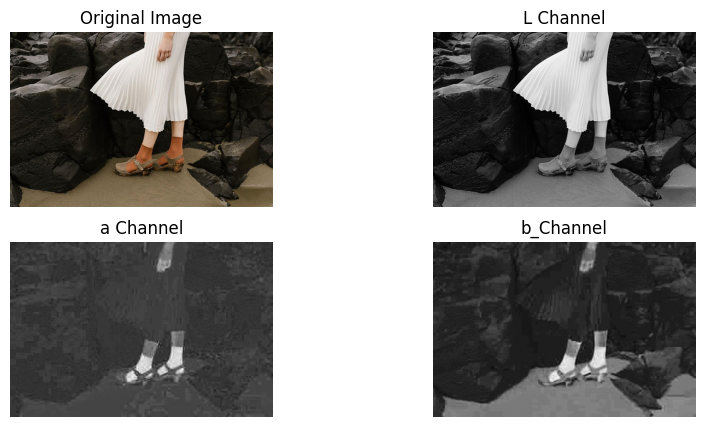

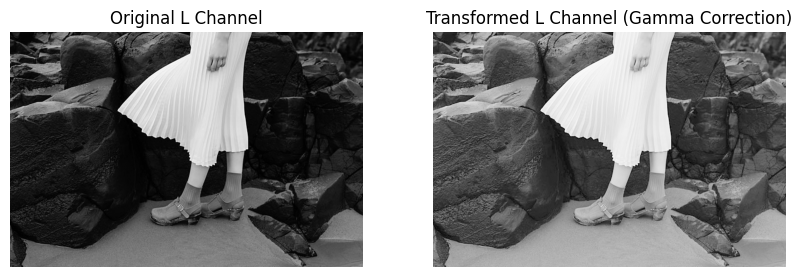

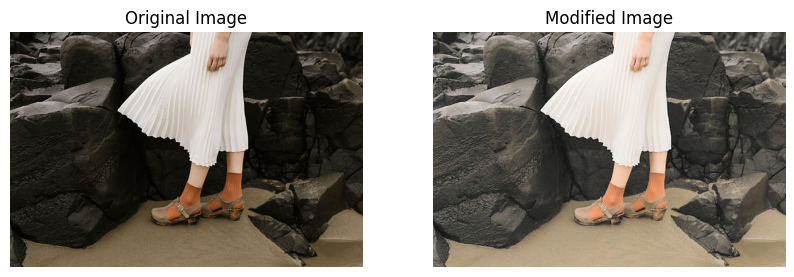

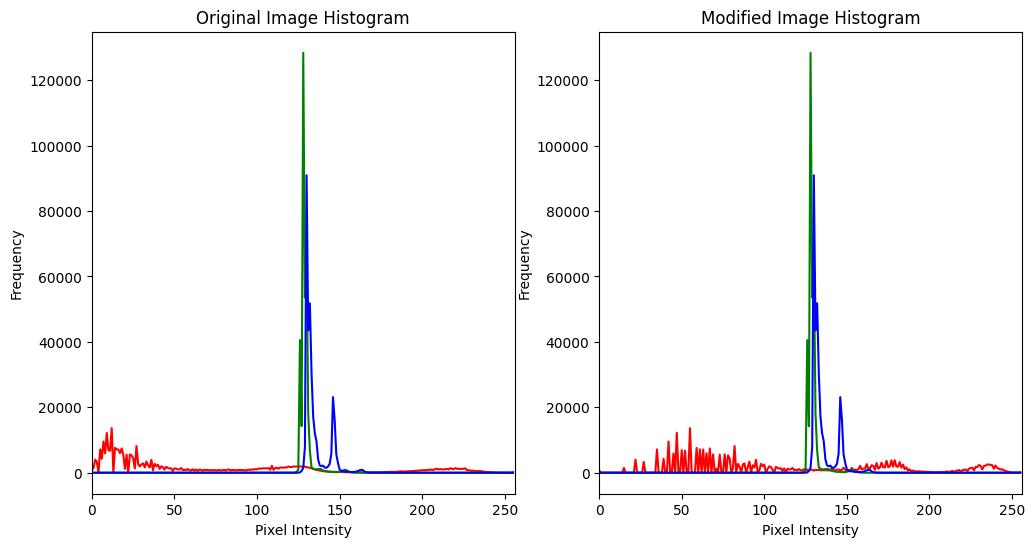

In [87]:
org_img = cv2.imread('a1images\highlights_and_shadows.jpg', cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)

chnl_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2Lab)

L_channel, a_channel, b_channel = cv2.split(chnl_img)

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off') 

plt.subplot(222)
plt.imshow(L_channel, cmap='gray')
plt.title('L Channel')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap='gray')
plt.title('a Channel')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap='gray')  
plt.title('b_Channel')
plt.axis('off')
plt.show()

gamma = 0.5
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
L_channel_transformed = cv2.LUT(L_channel, table)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(L_channel, cmap='gray')
plt.title('Original L Channel')
plt.axis('off')

plt.subplot(122)
plt.imshow(L_channel_transformed , cmap='gray')
plt.title('Transformed L Channel (Gamma Correction)')
plt.axis('off')

# Merge the modified L channel with the original a and b channels
modified_lab_img = cv2.merge((L_channel_transformed, a_channel, b_channel))

# Convert back to RGB color space
modified_chnl_img = cv2.cvtColor(modified_lab_img, cv2.COLOR_Lab2BGR)
modified_rgb_img = cv2.cvtColor(modified_chnl_img, cv2.COLOR_BGR2RGB)

# Display the original and modified RGB images
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original Image') 
plt.axis('off')
plt.subplot(122)
plt.imshow(modified_rgb_img)
plt.title('Modified Image')
plt.axis('off')

#The histograms of the original and corrected images
fig,ax = plt.subplots(1, 2, figsize=(12, 6))
space = ('l', 'a', 'b')
colors = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv2.calcHist([chnl_img], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=colors[i])
    hist_gamma = cv2.calcHist([modified_lab_img], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=colors[i])

ax[0].set_title('Original Image Histogram')
ax[1].set_title('Modified Image Histogram')
ax[0].set_xlim([0, 256])
ax[1].set_xlim([0, 256])
ax[0].set_xlabel('Pixel Intensity')
ax[1].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
plt.show()    






## Increasing the vibrance of a photograph



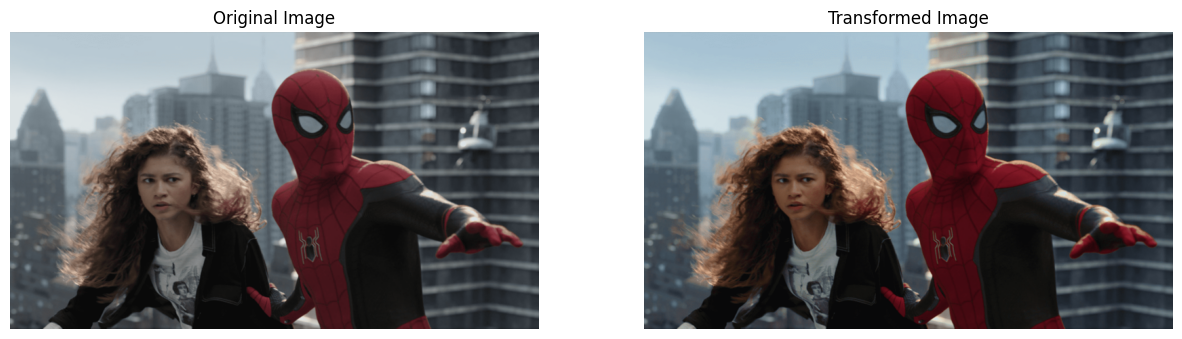

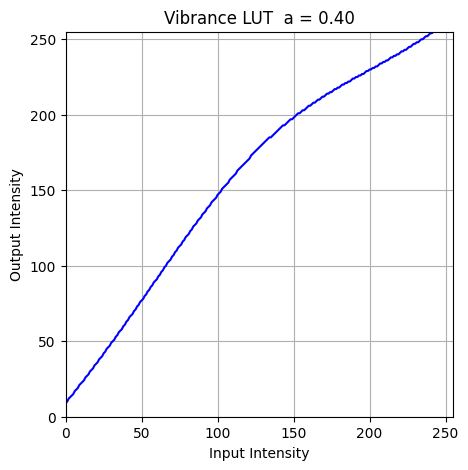

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


def vibrance_transform(image, a, sigma=70):
    
    
    rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    hsv_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv.split(hsv_img)

    lut = np.array([int(min(x + (a * 128) * np.exp((-(x - 128) ** 2) / (2 * (sigma ** 2))), 255)) for x in range(256)], dtype=np.uint8)

    s_channel_transformed = cv.LUT(s_channel, lut)
    hsv_img_transformed = cv.merge((h_channel, s_channel_transformed, v_channel))
    rgb_img_transformed = cv.cvtColor(hsv_img_transformed, cv.COLOR_HSV2BGR)
    
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.imshow(rgb_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(rgb_img_transformed)
    plt.title('Transformed Image')
    plt.axis('off')

    intensity_values = np.arange(256)
    plt.figure(figsize=(5, 5))
    plt.plot(intensity_values, lut, color='blue')
    plt.title('Vibrance LUT  a = {:.2f}'.format(a))
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.grid()
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.show()

spider_img = cv.imread('a1images/spider.png',cv2.IMREAD_COLOR)

# a_value = [i*0.25 for i in range(0, 5, 1)]        # Example values for 'a'

# for a in a_value:
#     vibrance_transform(spider_img, a)

vibrance_transform(spider_img, 0.4)  # Example with a single value for 'a'

## Histogram  Equalization

(-1000.0, 18718.0)

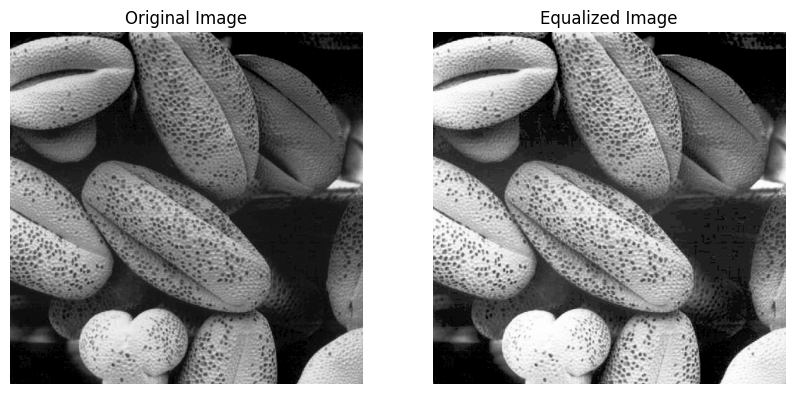

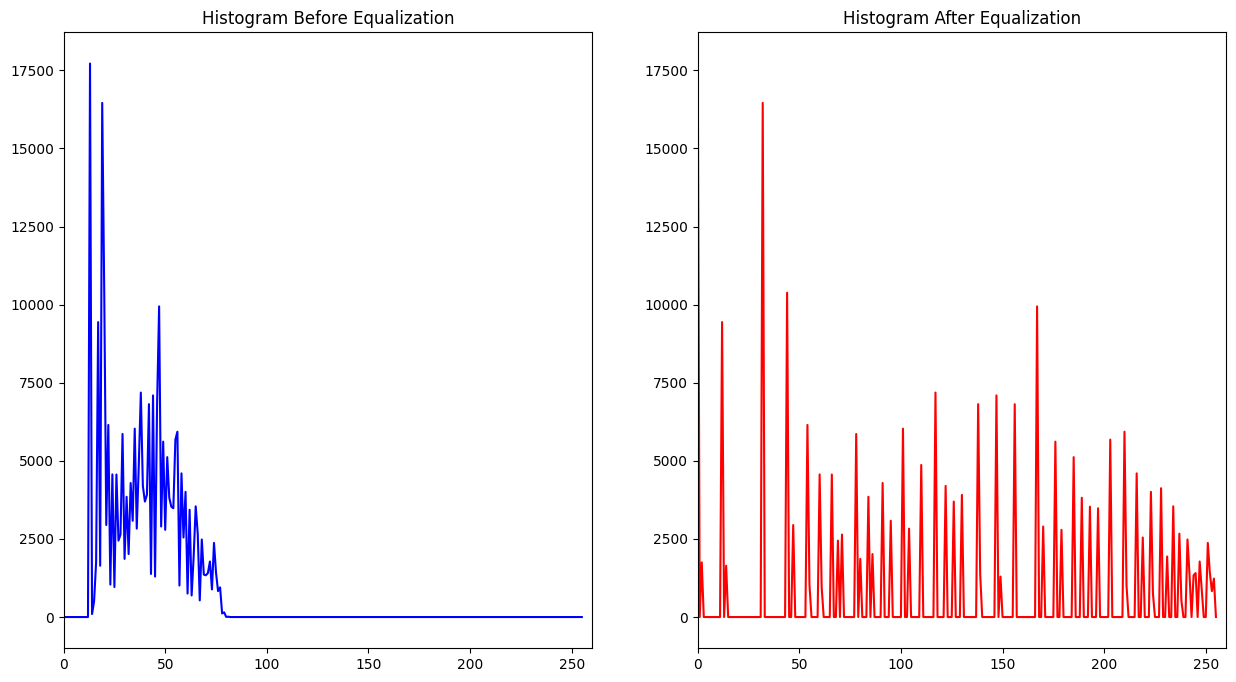

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def custom_histogram_equalization(image):

    # Compute histogram
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Normalize the CDF to [0, 255]

    cdf_m = np.ma.masked_equal(cdf, 0) # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min())* 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8') # Fill masked values with 0 and convert to uint8

    # Map the original pixel values to the new pixel values using the CDF

    img_equalized = cdf_final[image]
    
    # histogram after equalization
    hist_after_equal, _ = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])

    return img_equalized, hist  , hist_after_equal


img = cv2.imread("a1images/shells.tif", cv2.IMREAD_GRAYSCALE) 

equalized_img, hist_before, hist_after = custom_histogram_equalization(img)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(hist_before, color='b')
plt.title("Histogram Before Equalization")
plt.xlim([0, 260])
plt.ylim([-1000,hist_before.max() + 1000])

plt.subplot(122)
plt.plot(hist_after, color='r')
plt.title("Histogram After Equalization")
plt.xlim([0, 260])
plt.ylim([-1000,hist_before.max() + 1000 ])










## Histogram Equalization to Make Histogram Equlaized Foreground

###  (a)  hue, saturation, and values and display these planes in grayscale 

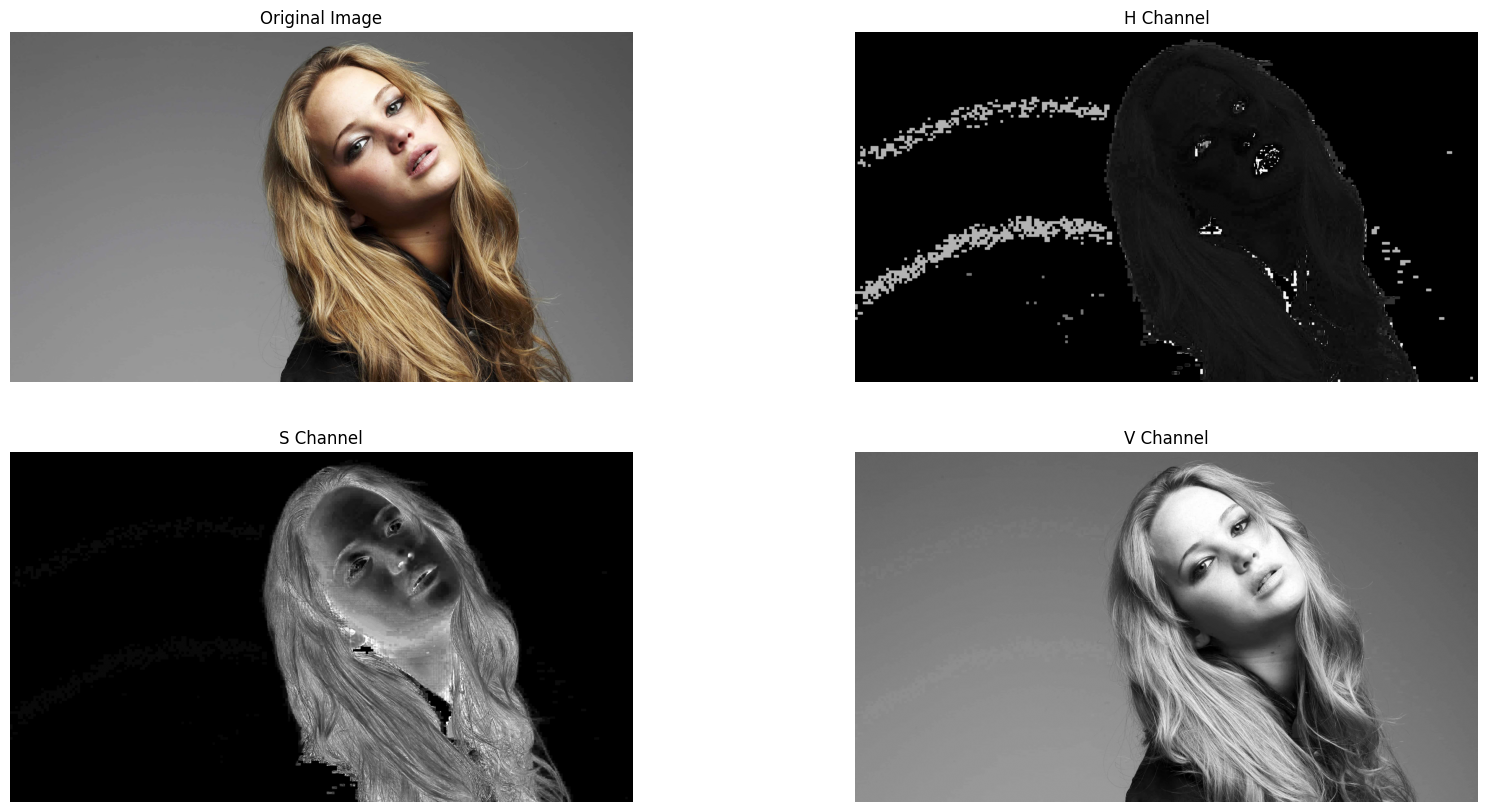

In [90]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_jeniffer = cv.imread('a1images/jeniffer.jpg', cv2.IMREAD_COLOR)

img_jeniffer_rgb = cv.cvtColor(img_jeniffer, cv2.COLOR_BGR2RGB)

img_jeniffer_hsv = cv.cvtColor(img_jeniffer_rgb, cv2.COLOR_RGB2HSV)

h_channel, s_channel, v_channel = cv.split(img_jeniffer_hsv)

plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.imshow(img_jeniffer_rgb, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(h_channel, cmap='gray')
plt.title('H Channel')
plt.axis('off')

plt.subplot(223)
plt.imshow(s_channel, cmap='gray')
plt.title('S Channel')
plt.axis('off')

plt.subplot(224)
plt.imshow(v_channel, cmap='gray')
plt.title('V Channel')
plt.axis('off')
plt.show()





###  (b) Select the appropriate plane to threshold in extract the foreground mask

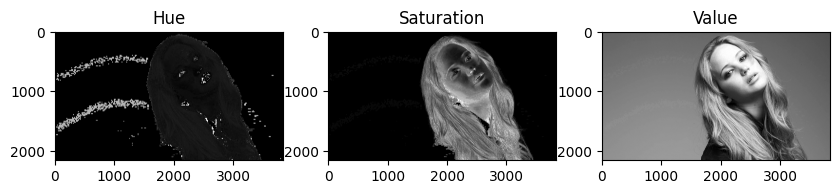

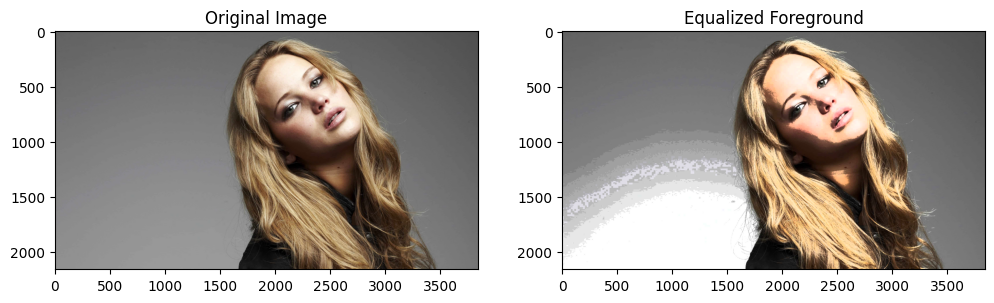

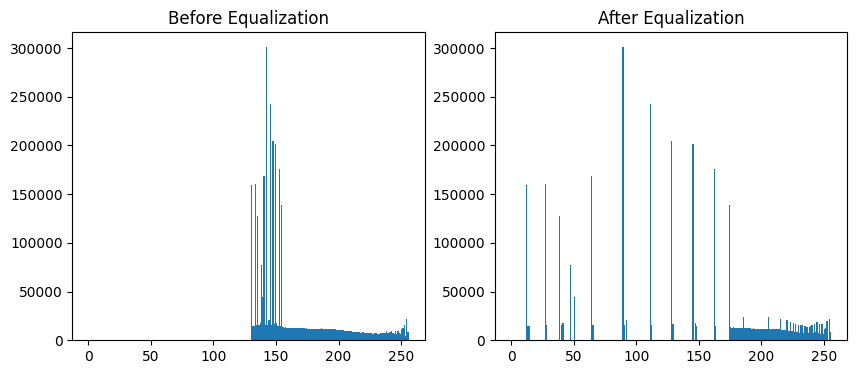

In [104]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step (a) — Read the image and split into HSV channels
img = cv.imread('a1images\jeniffer.jpg')  # Change to your actual filename
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Display H, S, V in grayscale
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(h, cmap='gray'), plt.title('Hue')
plt.subplot(1, 3, 2), plt.imshow(s, cmap='gray'), plt.title('Saturation')
plt.subplot(1, 3, 3), plt.imshow(v, cmap='gray'), plt.title('Value')
plt.show()

# Step (b) — Threshold the Value channel to get the foreground mask
_, mask = cv.threshold(v, 160, 200, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Step (c) — Get the foreground from the Value channel
foreground_v = cv.bitwise_and(v, v, mask=mask)

# Step (d) — Compute histogram and cumulative sum for the foreground
hist, bins = np.histogram(foreground_v[foreground_v > 0], bins=256, range=(0, 256))
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype(np.uint8)

# Step (e) — Apply histogram equalization to the foreground values
equalized_foreground_v = cdf_normalized[foreground_v]

# Step (f) — Merge equalized foreground with original background
background_v = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
merged_v = cv.add(background_v, equalized_foreground_v)

# Merge channels back and convert to BGR
equalized_hsv = cv.merge([h, s, merged_v])
final_img = cv.cvtColor(equalized_hsv, cv.COLOR_HSV2BGR)

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB)), plt.title('Equalized Foreground')
plt.show()

# Show histograms before and after
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.hist(foreground_v[foreground_v > 0].ravel(), bins=256, range=(0, 256)), plt.title('Before Equalization')
plt.subplot(1, 2, 2), plt.hist(equalized_foreground_v[foreground_v > 0].ravel(), bins=256, range=(0, 256)), plt.title('After Equalization')
plt.show()
